In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.stats as sts

In [2]:
# files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# read the city data and store it as a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# read the ride data and store it as a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## inspect the city dataframe


1. Get all the rows that contain null values
2. Make sure the driver_count column has an integer data type.
3. Find out how many data points there are for each type of city.


In [5]:
# get rows and columns that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# get rows and columns that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get the data types of each columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get the unique city types
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# get the number of data points from the Urban cities
sum(city_data_df['type'] == 'Urban')

66

In [10]:
# get the number of data points from the Suburban 
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
# get the number of data points from the Rular cities 
sum(city_data_df['type'] == 'Rural')

18

## inspect the ride dataframe


1. Get all the rows that contain null values.
2. Make sure the fare and ride_id columns are numerical data types.

In [12]:
#get columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# get columns and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## merge dataframes

* When we merge two DataFrames, we merge on a column with the same data, and the same column name, in both DataFrames. 
    - Use the following syntax to do that:
    `new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])`

In [15]:
# combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## create dataframes for each type of city

In [16]:
pyber_data_df.groupby('type').count()

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [17]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [18]:
urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## get the number of rides for each city type

In [19]:
# get the muber of rides for city in each city type
urban_ride_count = urban_cities_df.groupby('city')['ride_id'].count()
suburban_ride_count = suburban_cities_df.groupby('city')['ride_id'].count()
rural_ride_count = rural_cities_df.groupby('city')['ride_id'].count()

urban_ride_count.head(3)
suburban_ride_count.head(3)
rural_ride_count.head(3)

city
Amandaburgh    18
Barajasview    22
Carriemouth    27
Name: ride_id, dtype: int64

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Name: ride_id, dtype: int64

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Name: ride_id, dtype: int64

## get the avegage fare for each city type

`urban_cities_df.groupby('city')[['fare', 'driver_count']].mean()`

In [20]:
# get the average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby('city')['fare'].mean()
suburban_avg_fare = suburban_cities_df.groupby('city')['fare'].mean()
rural_avg_fare = rural_cities_df.groupby('city')['fare'].mean()

urban_avg_fare.head(3)
suburban_avg_fare.head(3)
rural_avg_fare.head(3)

city
Amandaburgh    24.641667
Barajasview    25.332273
Carriemouth    28.314444
Name: fare, dtype: float64

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Name: fare, dtype: float64

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Name: fare, dtype: float64

## get the average number of drivers for each city type

In [21]:
# get the average number of drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby('city')['driver_count'].mean()
suburban_driver_count = suburban_cities_df.groupby('city')['driver_count'].mean()
rural_driver_count = rural_cities_df.groupby('city')['driver_count'].mean()

urban_driver_count.head(3)
suburban_driver_count.head(3)
rural_driver_count.head(3)

city
Amandaburgh    12.0
Barajasview    26.0
Carriemouth    52.0
Name: driver_count, dtype: float64

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Name: driver_count, dtype: float64

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Name: driver_count, dtype: float64

## create buble charts

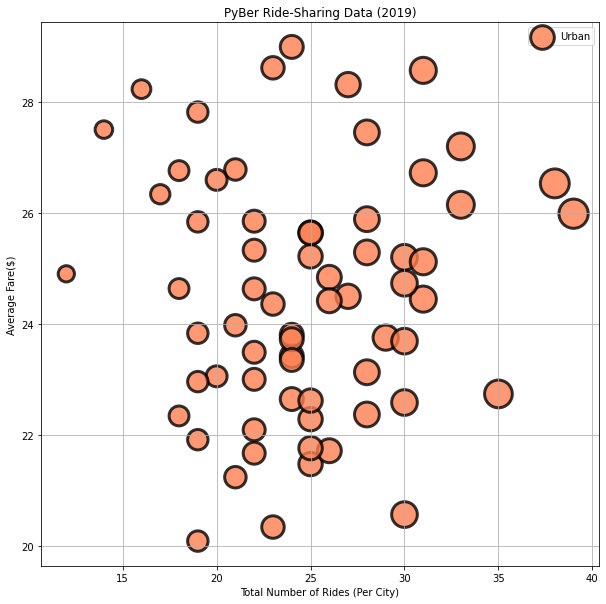

In [22]:
# build the scatter plots for urban cities
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c='coral', 
            linewidths=3,
            edgecolor='black',
            s=urban_ride_count * 22,
            alpha=0.8,
            label='Urban')

# plt.scatter(suburban_ride_count, 
#             suburban_avg_fare, 
#             color='skyblue', 
#             linewidths=3, 
#             s=suburban_ride_count,
#             label='Suburban')

# plt.scatter(rural_ride_count, 
#             rural_avg_fare, 
#             color='yellow', 
#             linewidths=3, 
#             s=rural_ride_count,
#             label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid()
plt.show();

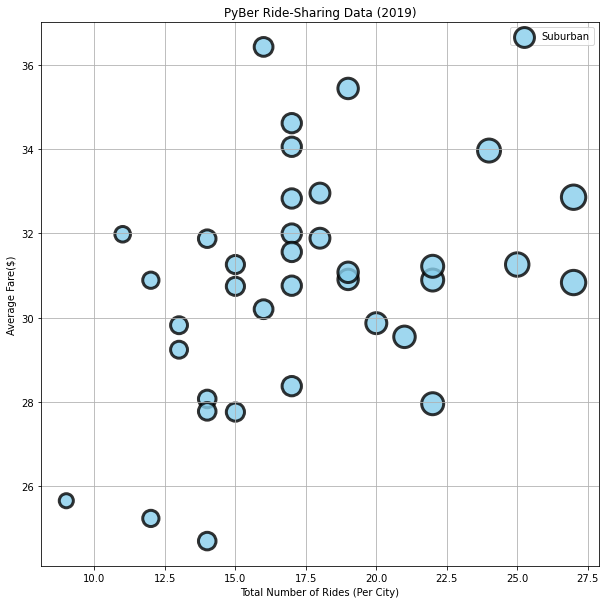

In [23]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            c='skyblue', 
            linewidths=3,
            edgecolor='black',
            s=suburban_ride_count * 22,
            alpha=0.8,
            label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend()
plt.grid()
plt.show();

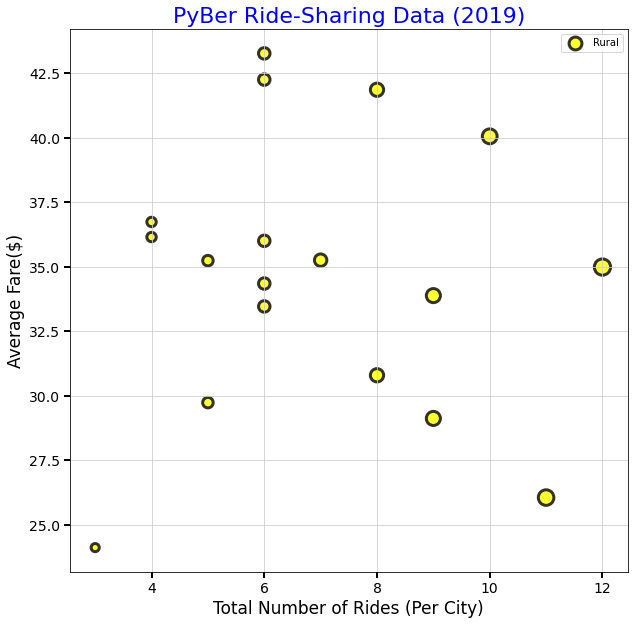

In [24]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            c='yellow', 
            linewidths=3,
            edgecolor='black',
            s=rural_ride_count * 22,
            alpha=0.8,
            label='Rural')

ax.tick_params(
    axis='both',
    direction='out',
    labelrotation=0,
    labelsize=14,
    length=6, 
    width=2, 
    colors='k',
    grid_color='#ccc')

# ax.tick_params(
#     axis='y',
#     direction='out',
#     labelrotation=0,
#     labelsize=14,
#     length=6, 
#     width=2, 
#     colors='k',
#     grid_color='#ccc')
ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=22, color='blue')
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=17)
ax.set_ylabel('Average Fare($)', fontsize=17)
plt.legend()
plt.grid()
plt.show();

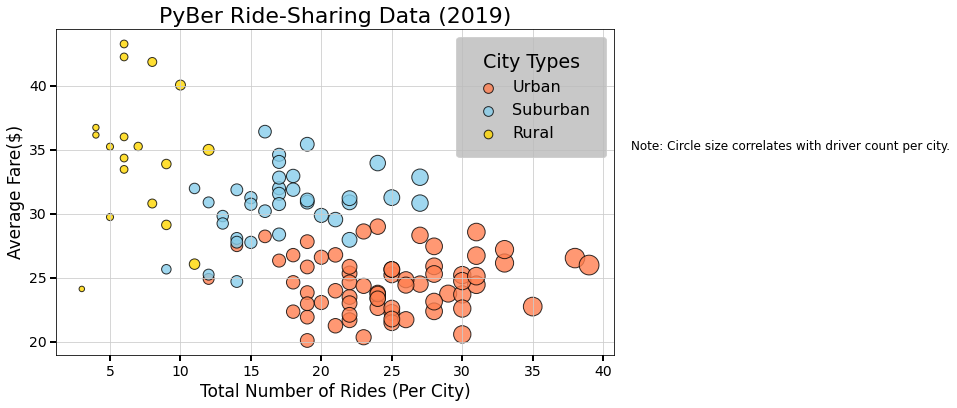

In [25]:
# build the scatter plots for suburban
fig, ax = plt.subplots(figsize=(10, 6))

#urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            c='coral', 
            linewidths=1,
            edgecolor='black',
            s=urban_ride_count * 10,
            alpha=0.8,
            label='Urban')

# suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            c='skyblue', 
            linewidths=1,
            edgecolor='black',
            s=suburban_ride_count * 10,
            alpha=0.8,
            label='Suburban')

# rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            c='gold', 
            linewidths=1,
            edgecolor='black',
            s=rural_ride_count * 10,
            alpha=0.8,
            label='Rural')

# ticks
ax.tick_params(
    axis='both',
    direction='out',
    labelrotation=0,
    labelsize=14,
    length=6, 
    width=2, 
    colors='k',
    grid_color='#ccc')

# axes labels and title
ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=22, color='k')
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=17)
ax.set_ylabel('Average Fare($)', fontsize=17)
lgnd = plt.legend(
    fontsize=16, 
    markerscale=0.9, 
    borderpad=1.0, 
    handletextpad=0.5,
    facecolor='#bbb',
    mode='expanded',
    loc='best',
    title='City Types')
for i in [0, 1, 2]:
    lgnd.legendHandles[i]._sizes = [95]

lgnd.get_title().set_fontsize(19)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
lgnd.legendHandles[2]._sizes = [75]
plt.grid()
plt.savefig('analysis/fig1.png')
plt.show();

## Summary statistics for number of rides per city type

In [26]:
# get summary statistics
print(f"URBAN\n{'-'* 20}")
urban_cities_df.describe()
print(f"\nSUBURBAN\n{'-'* 20}")
suburban_cities_df.describe()
print(f"\nRULAR\n{'-'* 20}")
rural_cities_df.describe()

URBAN
--------------------


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000



SUBURBAN
--------------------


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000



RULAR
--------------------


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
# get summary statistics 
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
# Calculate the mean of the ride count for each city type
# [round(eval(k).mean(), 2) for k in [f"{type}_ride_count" for type in "urban suburban rural".split()]]
type_avg_ride_count = [round(eval(f"{citytype}_ride_count").mean(), 2) for citytype in "urban suburban rural".split()]
type_avg_ride_count

[24.62, 17.36, 6.94]

In [29]:
# Calculate the median of the ride count for each city type
type_median_ride_count = [round(eval(f"{citytype}_ride_count").median(), 2) for citytype in "urban suburban rural".split()]
type_median_ride_count

[24.0, 17.0, 6.0]

In [30]:
# Calculate the mode of the ride count for each city type
type_mode_ride_count = [round(eval(f"{citytype}_ride_count").mode(), 2) for citytype in "urban suburban rural".split()]
type_mode_ride_count

[0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64]

## numpy mean and median funcs and scipy mode func

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [32]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17]), count=array([7]))

In [33]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

## summary statistics for the Fare by city type

In [34]:
# get the Fares for the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

### Calculate the measures of central tendency for the average fare 

In [35]:
# urban cities
print(f"\nURBAN\n{'-'*20}")
urban_mean_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${urban_mean_fares:.2f}")

urban_median_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${urban_median_fares:.2f}")

urban_mode_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {urban_mode_fares}")

# suburban cities
print(f"\nSUBURBAN\n{'-'*20}")
suburban_fares = suburban_cities_df['fare']
suburban_mean_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${suburban_mean_fares:.2f}")

suburban_median_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${suburban_median_fares:.2f}")

suburban_mode_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {suburban_mode_fares}")

# suburban cities
print(f"\nRURAL\n{'-'*20}")
rural_fares = rural_cities_df['fare']
rural_mean_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${rural_mean_fares:.2f}")

rural_median_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${rural_median_fares:.2f}")

rural_mode_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {rural_mode_fares}")



URBAN
--------------------
The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))

SUBURBAN
--------------------
The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))

RURAL
--------------------
The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


## Summary Statistics for the Number of Drivers by City Type

In [36]:
# get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [37]:
pyber_data_df.groupby('type')['driver_count'].agg('mean')

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [38]:
pyber_data_df.groupby('type')['fare'].agg(['mean', 'min', 'max'])

,mean,min,max
type,,,
Rural,34.623440,10.11,58.55
Suburban,30.970128,12.05,49.96
Urban,24.525772,4.05,44.97


# Create Box-and-Whisker Plots

## Box-and-Whisker Plots for Ride Count Data

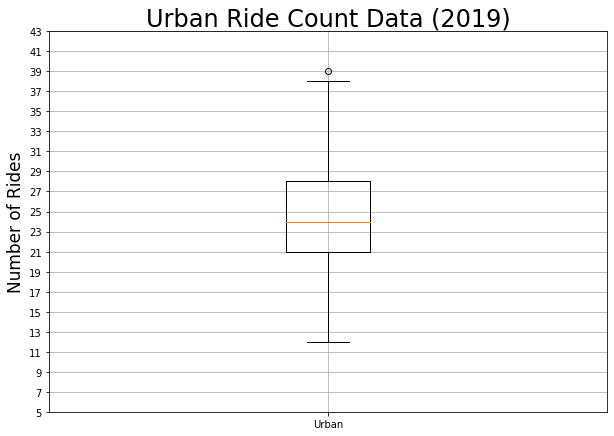

In [76]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Urban Ride Count Data (2019)', fontsize=24)
ax.set_ylabel('Number of Rides', fontsize=17)
ax.set_yticks(np.arange(5, 45, step=2.0))
ax.grid()
plt.show();

In [41]:
[f'{ct}_ride_count' for ct in 'urban suburban rural'.split()]

['urban_ride_count', 'suburban_ride_count', 'rural_ride_count']

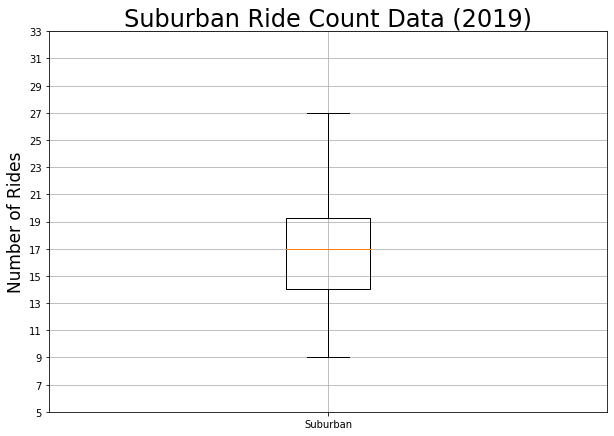

In [74]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Suburban']
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Suburban Ride Count Data (2019)', fontsize=24)
ax.set_ylabel('Number of Rides', fontsize=17)
ax.set_yticks(np.arange(5, 35, step=2.0))
ax.grid()
plt.show();

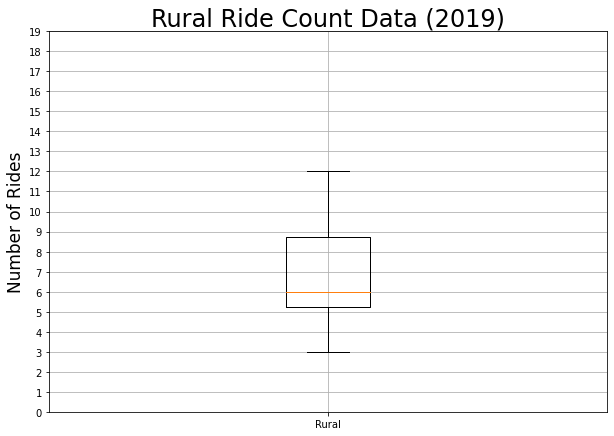

In [77]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Rural']
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Rural Ride Count Data (2019)', fontsize=24)
ax.set_ylabel('Number of Rides', fontsize=17)
ax.set_yticks(np.arange(0, 20, step=1.0))
ax.grid()
plt.show();

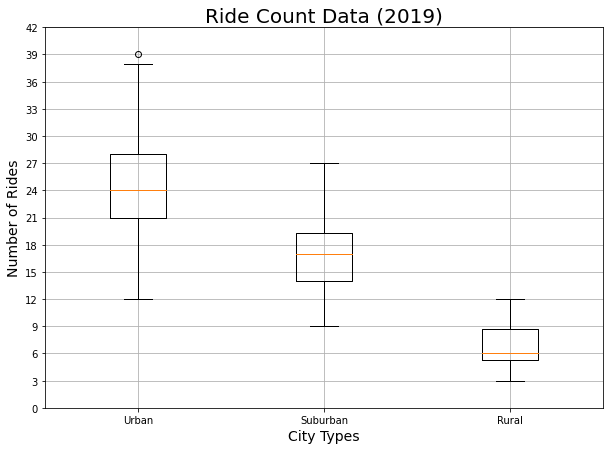

In [108]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = 'Urban Suburban Rural'.split()
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.set_xlabel('City Types', fontsize=14)
ax.grid()
plt.savefig('analysis/fig2.png')
plt.show();

In [109]:
# get the ciyt that matches 39 ride count
ride_count_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{ride_count_outlier} has the highest ride count.')

West Angela has the highest ride count.


## Box-and-Whisker Plots for Ride Fare Data

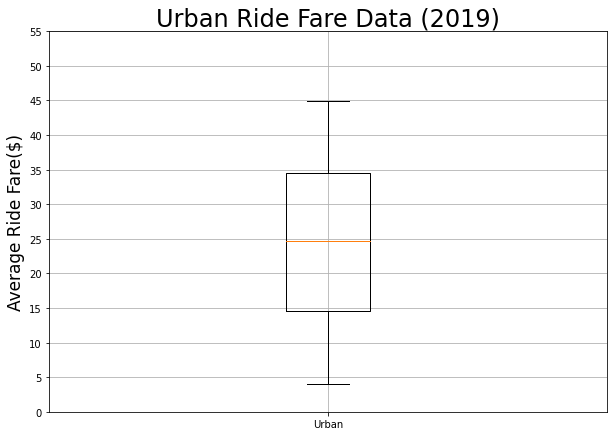

In [110]:
x_labels = ['Urban']
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title('Urban Ride Fare Data (2019)', fontsize=24)
ax.set_ylabel('Average Ride Fare($)', fontsize=17)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show();

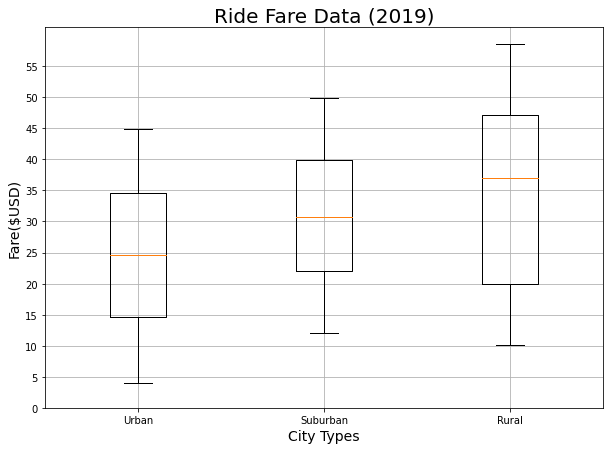

In [111]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = 'Urban Suburban Rural'.split()
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.set_xlabel('City Types', fontsize=14)
ax.grid()
plt.savefig('analysis/fig3.png')
plt.show();

## Box-and-Whisker Plots for Driver Count Data

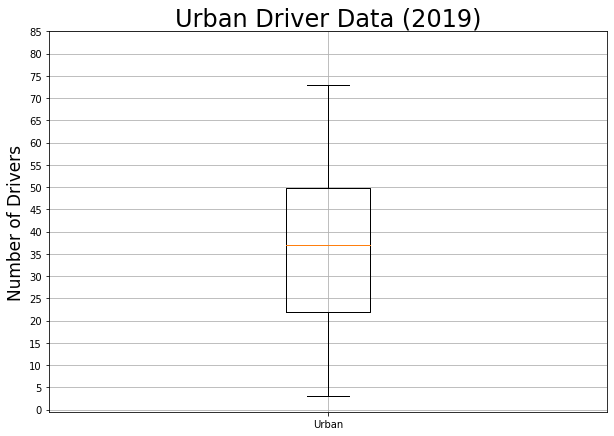

In [113]:
x_labels = ['Urban']
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(urban_driver_count, labels=x_labels)
ax.set_title('Urban Driver Data (2019)', fontsize=24)
ax.set_ylabel('Number of Drivers', fontsize=17)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show();

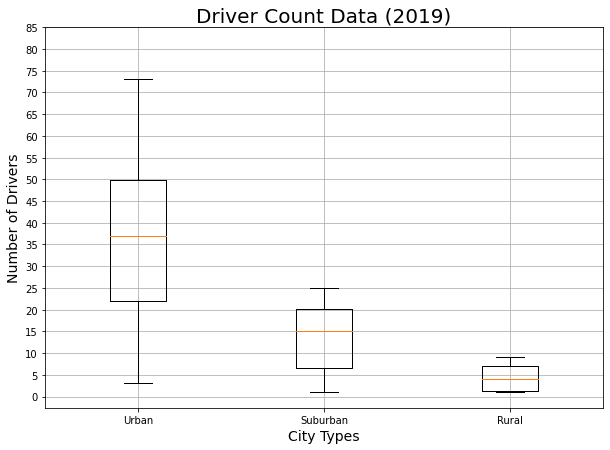

In [114]:
# create a box-and-whisker plot for driver count
x_labels = 'Urban Suburban Rural'.split()
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.set_xlabel('City Types', fontsize=14)
ax.grid()
plt.savefig('analysis/fig4.png')
plt.show();

In [135]:
# get % of fares by city type
citytype_fares = round(pyber_data_df.groupby('type')['fare'].sum() / pyber_data_df['fare'].sum() * 100, 1)

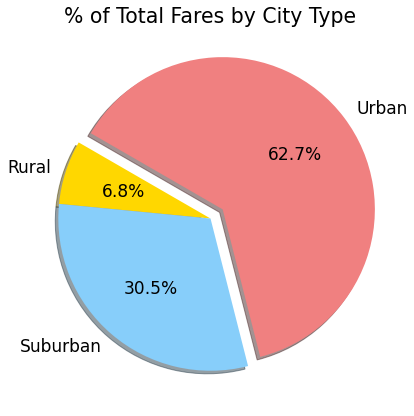

In [146]:
# create a pie chart for percentage of fares
colors = 'gold lightskyblue lightcoral'.split()
fig, ax = plt.subplots(figsize=(10, 7))
plt.pie(citytype_fares, 
        labels=list(citytype_fares.index),
        colors=colors,
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
ax.set_title('% of Total Fares by City Type')
mpl.rcParams['font.size']=17
plt.savefig('analysis/f5.png')
plt.show();

## Calculate Ride Percentages

In [151]:
# get % of fares by city type
citytype_rides = pyber_data_df.groupby('type')['ride_id'].count() / pyber_data_df['ride_id'].count() * 100
citytype_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

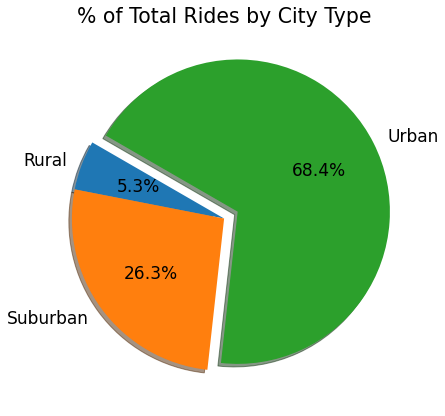

In [152]:
# create a pie chart for percentage of fares
colors = 'gold lightskyblue lightcoral'.split()
fig, ax = plt.subplots(figsize=(10, 7))
plt.pie(citytype_rides, 
        labels=list(citytype_fares.index),
#         colors=colors,
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
ax.set_title('% of Total Rides by City Type')
mpl.rcParams['font.size']=17
plt.savefig('analysis/f6.png')
plt.show();